# PROJEKT-OS
## Data analysis on 120 years of Olympic History

## Task 0 - Warmup the data, see some intital information

In [1]:
import pandas as pd
import plotly_express as px
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# File pathes
regions = pd.read_csv("Data/noc_regions.csv")
athlete_events = pd.read_csv("Data/athlete_events.csv")

# Getting some initial info
display(
    athlete_events.info(),
    athlete_events.shape,
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


None

(271116, 15)

## A) How many countries is it in the dataset

In [2]:
# First making df into a Series to be able to print out the unique countries as an f-string
regions1 = regions["region"]

print(f"{len(regions1.unique())} countries are represented in Olympic games")

207 countries are represented in Olympic games


## B) Which countries are included? (Abbreviations is enough)

In [3]:
print(regions["NOC"].unique())  # Printing out unque countries by only abbreviation

['AFG' 'AHO' 'ALB' 'ALG' 'AND' 'ANG' 'ANT' 'ANZ' 'ARG' 'ARM' 'ARU' 'ASA'
 'AUS' 'AUT' 'AZE' 'BAH' 'BAN' 'BAR' 'BDI' 'BEL' 'BEN' 'BER' 'BHU' 'BIH'
 'BIZ' 'BLR' 'BOH' 'BOL' 'BOT' 'BRA' 'BRN' 'BRU' 'BUL' 'BUR' 'CAF' 'CAM'
 'CAN' 'CAY' 'CGO' 'CHA' 'CHI' 'CHN' 'CIV' 'CMR' 'COD' 'COK' 'COL' 'COM'
 'CPV' 'CRC' 'CRO' 'CRT' 'CUB' 'CYP' 'CZE' 'DEN' 'DJI' 'DMA' 'DOM' 'ECU'
 'EGY' 'ERI' 'ESA' 'ESP' 'EST' 'ETH' 'EUN' 'FIJ' 'FIN' 'FRA' 'FRG' 'FSM'
 'GAB' 'GAM' 'GBR' 'GBS' 'GDR' 'GEO' 'GEQ' 'GER' 'GHA' 'GRE' 'GRN' 'GUA'
 'GUI' 'GUM' 'GUY' 'HAI' 'HKG' 'HON' 'HUN' 'INA' 'IND' 'IOA' 'IRI' 'IRL'
 'IRQ' 'ISL' 'ISR' 'ISV' 'ITA' 'IVB' 'JAM' 'JOR' 'JPN' 'KAZ' 'KEN' 'KGZ'
 'KIR' 'KOR' 'KOS' 'KSA' 'KUW' 'LAO' 'LAT' 'LBA' 'LBR' 'LCA' 'LES' 'LIB'
 'LIE' 'LTU' 'LUX' 'MAD' 'MAL' 'MAR' 'MAS' 'MAW' 'MDA' 'MDV' 'MEX' 'MGL'
 'MHL' 'MKD' 'MLI' 'MLT' 'MNE' 'MON' 'MOZ' 'MRI' 'MTN' 'MYA' 'NAM' 'NBO'
 'NCA' 'NED' 'NEP' 'NFL' 'NGR' 'NIG' 'NOR' 'NRU' 'NZL' 'OMA' 'PAK' 'PAN'
 'PAR' 'PER' 'PHI' 'PLE' 'PLW' 'PNG' 'POL' 'POR' 'P

## C) Which sports is in the Olympic games?

In [4]:
# Here we print out all the sports that we have
print(athlete_events["Sport"].unique())

# Printing out the amount of Sports
athlete_events1 = athlete_events["Sport"]
print(f"We have {len(athlete_events1.unique())} different sports")

['Basketball' 'Judo' 'Football' 'Tug-Of-War' 'Speed Skating'
 'Cross Country Skiing' 'Athletics' 'Ice Hockey' 'Swimming' 'Badminton'
 'Sailing' 'Biathlon' 'Gymnastics' 'Art Competitions' 'Alpine Skiing'
 'Handball' 'Weightlifting' 'Wrestling' 'Luge' 'Water Polo' 'Hockey'
 'Rowing' 'Bobsleigh' 'Fencing' 'Equestrianism' 'Shooting' 'Boxing'
 'Taekwondo' 'Cycling' 'Diving' 'Canoeing' 'Tennis' 'Modern Pentathlon'
 'Figure Skating' 'Golf' 'Softball' 'Archery' 'Volleyball'
 'Synchronized Swimming' 'Table Tennis' 'Nordic Combined' 'Baseball'
 'Rhythmic Gymnastics' 'Freestyle Skiing' 'Rugby Sevens' 'Trampolining'
 'Beach Volleyball' 'Triathlon' 'Ski Jumping' 'Curling' 'Snowboarding'
 'Rugby' 'Short Track Speed Skating' 'Skeleton' 'Lacrosse' 'Polo'
 'Cricket' 'Racquets' 'Motorboating' 'Military Ski Patrol' 'Croquet'
 'Jeu De Paume' 'Roque' 'Alpinism' 'Basque Pelota' 'Aeronautics']
We have 66 different sports


# D) Which medal types are there? 

In [5]:
# Could use alternative
athlete_events["Medal"].value_counts()

Gold      13372
Bronze    13295
Silver    13116
Name: Medal, dtype: int64

## E) Find out some statistics about age: mean, median, min, max, standard deviation(std):




In [6]:
athlete_events.tail()

# Age är en float

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN
271115,135571,Tomasz Ireneusz ya,M,34.0,185.0,96.0,Poland,POL,2002 Winter,2002,Winter,Salt Lake City,Bobsleigh,Bobsleigh Men's Four,NaN


In [7]:
# This shall be printed out as an f string but i had to go


# athlete_events["Age"].mean())
# print(athlete_events["Age"].median())
# print(athlete_events["Age"].min()
# print(athlete_events["Age"].max()
# print(athlete_events["Age"]std())

Uppgift 0 - Uppvärmning
Börja med att göra explorativ dataanalys över hela datasettet. Generella frågor att besvara med hjälp av datan:

  e. ta reda på statistik för åldern: medelvärde, median, min, max, standardavvikelse,

  g. diagram över könsfördelningen
  h. diagram över topp 10 länder som tagit flest medaljer
  i. plotta gärna fler saker som är intressant.

  f. utforska datan vidare med egna frågor

## H) diagram över topp 10 länder som tagit flest medaljer

In [8]:
# Diagram over top10 countries that has taken most medals

athlete_events.head()

#

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [9]:
df_top10_countries = athlete_events[athlete_events["Medal"].isna() == False]
df_top10_countries.value_counts("NOC").loc["SWE"]

1536

In [10]:
df_top10_countries2 = df_top10_countries.value_counts("NOC")
df_top10_countries2.head(10)

NOC
USA    5637
URS    2503
GER    2165
GBR    2068
FRA    1777
ITA    1637
SWE    1536
CAN    1352
AUS    1320
RUS    1165
dtype: int64

In [11]:
df = pd.DataFrame(df_top10_countries2)
df.head(10)

,0
NOC,
USA,5637
URS,2503
GER,2165
GBR,2068
FRA,1777
ITA,1637
SWE,1536
CAN,1352
AUS,1320


In [12]:
fig = px.bar(df.reset_index().head(10), x="NOC", y=0, title="Top 10 Countries Medals")
fig.show()

# i) 
# Age distrubution (Vem är längst, äldst eller tyngst? lättast?

In [13]:
athlete_events["Age"].describe()

count    261642.000000
mean         25.556898
std           6.393561
min          10.000000
25%          21.000000
50%          24.000000
75%          28.000000
max          97.000000
Name: Age, dtype: float64

In [14]:
# We can see that some people in Age has NaN values
athlete_events["Age"].isnull().sum()

mean_value = athlete_events["Age"].mean()

# Replacing NaNs in Age with medium value, updating the original df
athlete_events["Age"].fillna(value=mean_value, inplace=True)
print("Updated DF")
athlete_events.head()

Updated DF


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [15]:
# Andel medaljer per ålder

# Check age proportion proportion to age
athlete_events.groupby("Age")["Medal"].value_counts()

Age   Medal 
10.0  Bronze    1
11.0  Silver    1
12.0  Bronze    3
      Silver    3
13.0  Gold      7
               ..
71.0  Bronze    1
      Silver    1
72.0  Bronze    1
      Silver    1
73.0  Silver    1
Name: Medal, Length: 168, dtype: int64

[Text(0.5, 1.0, 'Proportion of medals among different ages')]

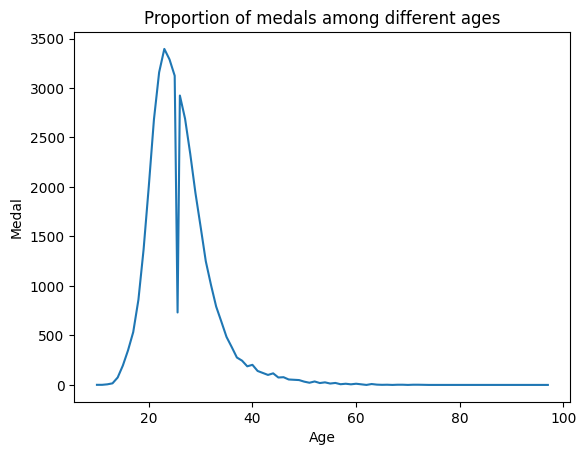

In [16]:
# New df with proportion per year
df_medals_age = athlete_events.groupby("Age").count()["Medal"]
df_medals_age = pd.DataFrame(df_medals_age)
# Sorting values on age in ascending order
df_medals_age2 = df_medals_age.sort_values(by="Age", ascending=True)


# Setting up the lineplot
ax = sns.lineplot(data=df_medals_age2, x="Age", y="Medal")
ax.set(title="Proportion of medals among different ages")

NameError: name 'participation_top_10_countries' is not defined

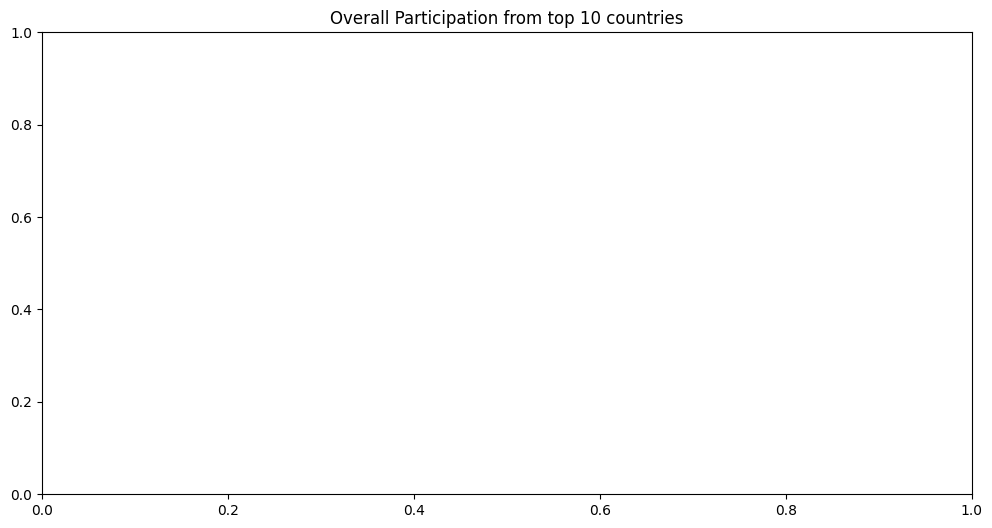

In [17]:
participation_top_15_countries = (
    athlete_events.Team.value_counts().sort_values(ascending=False).head(15)
)
# top_10_countries

# Visual overall particapation over all years
plt.figure(figsize=(12, 6))
plt.title("Overall Participation from top 10 countries")
sns.barplot(
    x=participation_top_10_countries.index,
    y=participation_top_10_countries,
    palette="Set2",
);

China

In [ ]:
# df_china = athlete_events['Team']=="China"
# athlete_events[df_china].head()

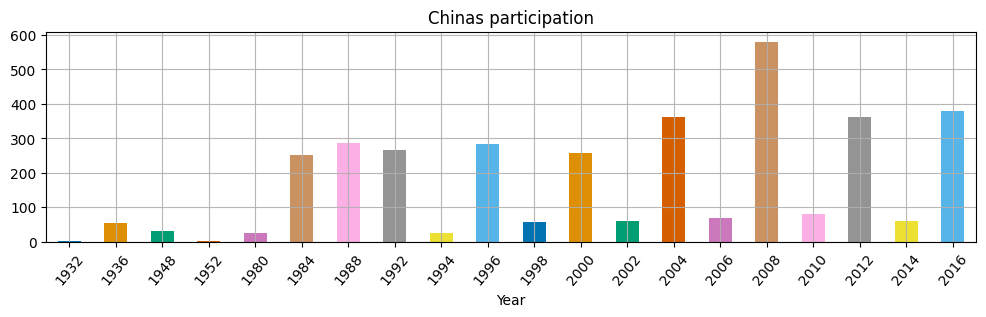

In [ ]:
# df_china = athlete_events['Team']=="China"
df_china = athlete_events[athlete_events.Team == "China"]
data_china = df_china.loc[:, ["ID", "Year"]]

plt.figure(figsize=(12, 6))
plt.subplot(211)


china = (
    data_china.groupby("Year")["ID"]
    .nunique()
    .plot(
        kind="bar",
        color=sns.color_palette("colorblind"),
        linewidth=1,
    )
)


plt.title("Chinas participation")
plt.xticks(rotation=50)
plt.grid(True, alpha=0.9)
plt.show()

In [ ]:
athlete_events.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [ ]:
# # Concat and merging datasets
df = pd.concat([athlete_events,regions], keys='NOC')
df = pd.merge(athlete_events, regions, how='left', on='NOC')

In [ ]:
# df.head()

In [ ]:
# df1 = df.groupby('region')['Medal'].count().nlargest(10).nlargest(10).reset_index()
# df1.head()

In [ ]:
import plotly.express as px

def top_10_countries_medals2(athlete_events):
    df1 = df.groupby("region")["Medal"].count().nlargest(10).nlargest(10).reset_index()
    

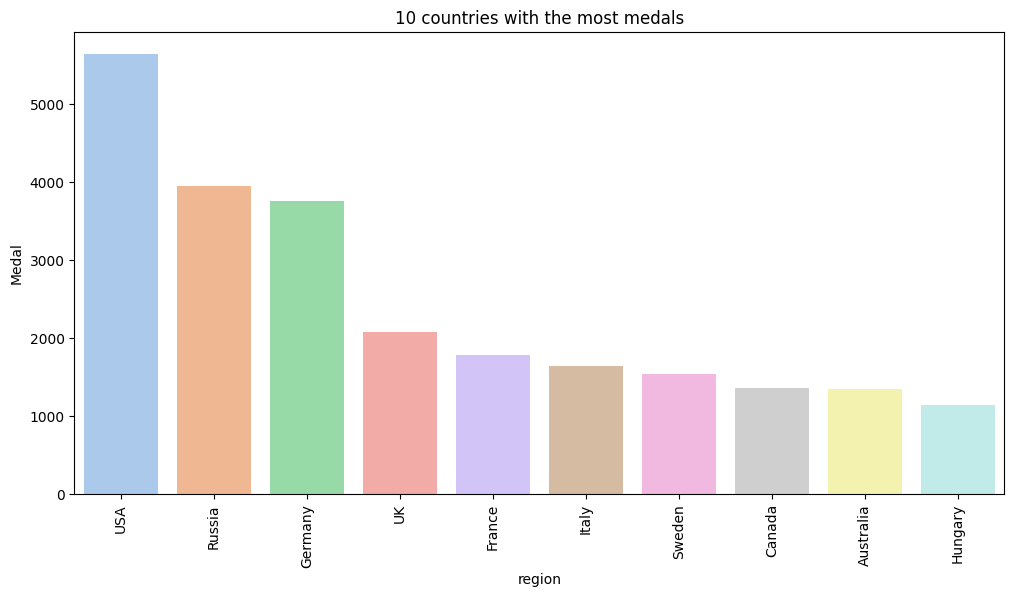

In [ ]:
def top_10_countries_medals(athlete_events):
    df1 = df.groupby("region")["Medal"].count().nlargest(10).nlargest(10).reset_index()
    plt.figure(figsize=(12,6))
    plt.title("10 countries with the most medals")
    plt.xlabel("Regions")
    plt.ylabel("Medals")
    plt.xticks(rotation=90)
    fig = sns.barplot(x=df1["region"], y=df1["Medal"], palette='pastel')
    return fig

fig = top_10_countries_medals(athlete_events)




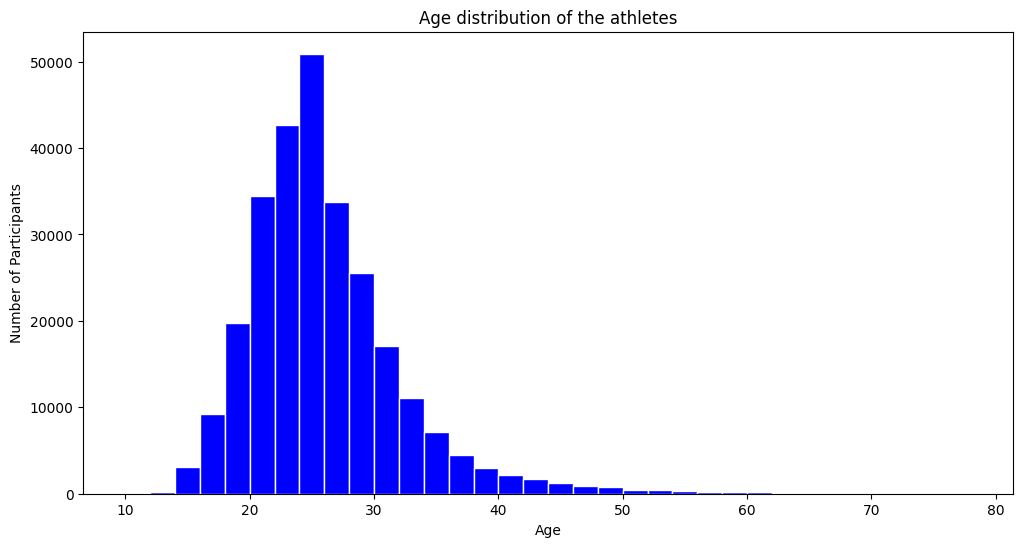

In [18]:
# Visual for and cleaning for age distribution of the athletes


def age_distribution_athletes(athlete_events):
    plt.figure(figsize=(12, 6))
    plt.title("Age distribution of the athletes")
    plt.xlabel("Age")
    plt.ylabel("Number of Participants")
    # https://numpy.org/doc/stable/reference/generated/numpy.arange.html
    fig = plt.hist(
        athlete_events.Age, bins=np.arange(10, 80, 2), color="blue", edgecolor="white"
    )
    return fig


fig = age_distribution_athletes(athlete_events)

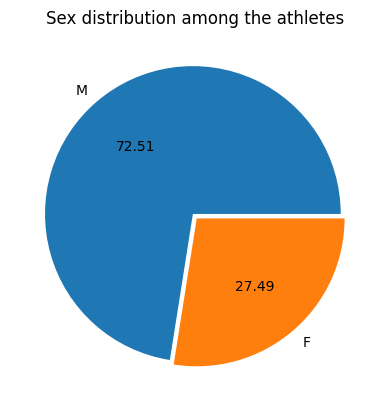

In [ ]:
def sex_distribution_athletes(athlete_events):
    gender_count = athlete_events.Sex.value_counts()
    myexplode = (0.02, 0.02) # Splitting the pie chart
    plt.pie(gender_count, labels =['M','F'], autopct='%.2f', explode= myexplode)
    plt.title('Sex distribution among the athletes')
    return

sex_distribution_athletes(athlete_events)

In [ ]:
athlete_events.reset_index().head()
athlete_events["Sport"]

,index,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
